# Project Exploration
## By James Vuong and Troy Bechtold
### CPSC 322, Spring 2022

### Introduction
In our project, we decided to try to classify movie information and see if we can predict movies that a user would want to watch based on their info. We used two different datasets, OMDb annd TMDb. These datasets had title, genres, box office, ratings, what it was rated, and much more. We used a these columns are more to predict what a user would want to see.

### Our Dataset
Our dataset is about 5000+ lines of movie information and 40 attributes combined. 

In [1]:
# some useful mysklearn package import statements and reloads
import importlib
import contextlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import prediction_class
importlib.reload(prediction_class)
import prediction_class as pc
import plot_utils
import utils

### Data Distribution


In [2]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

movie_table = MyPyTable()
movie_table.load_from_file("input_data/cleaned_movie_data.csv", False)
titles = [str(value) for value in movie_table.get_column("title")]
genre_1, genre_2, genre_3 = myutils.seperate_genre(movie_table.get_column("genres"))
metascore = movie_table.get_column("metascore")
imdbrating = movie_table.get_column("imdbrating")
boxoffices = movie_table.get_column("boxoffice")
runtimes = movie_table.get_column("runtime")
years = movie_table.get_column("year")
release_dates = movie_table.get_column("release_date")
rated = movie_table.get_column("rated")

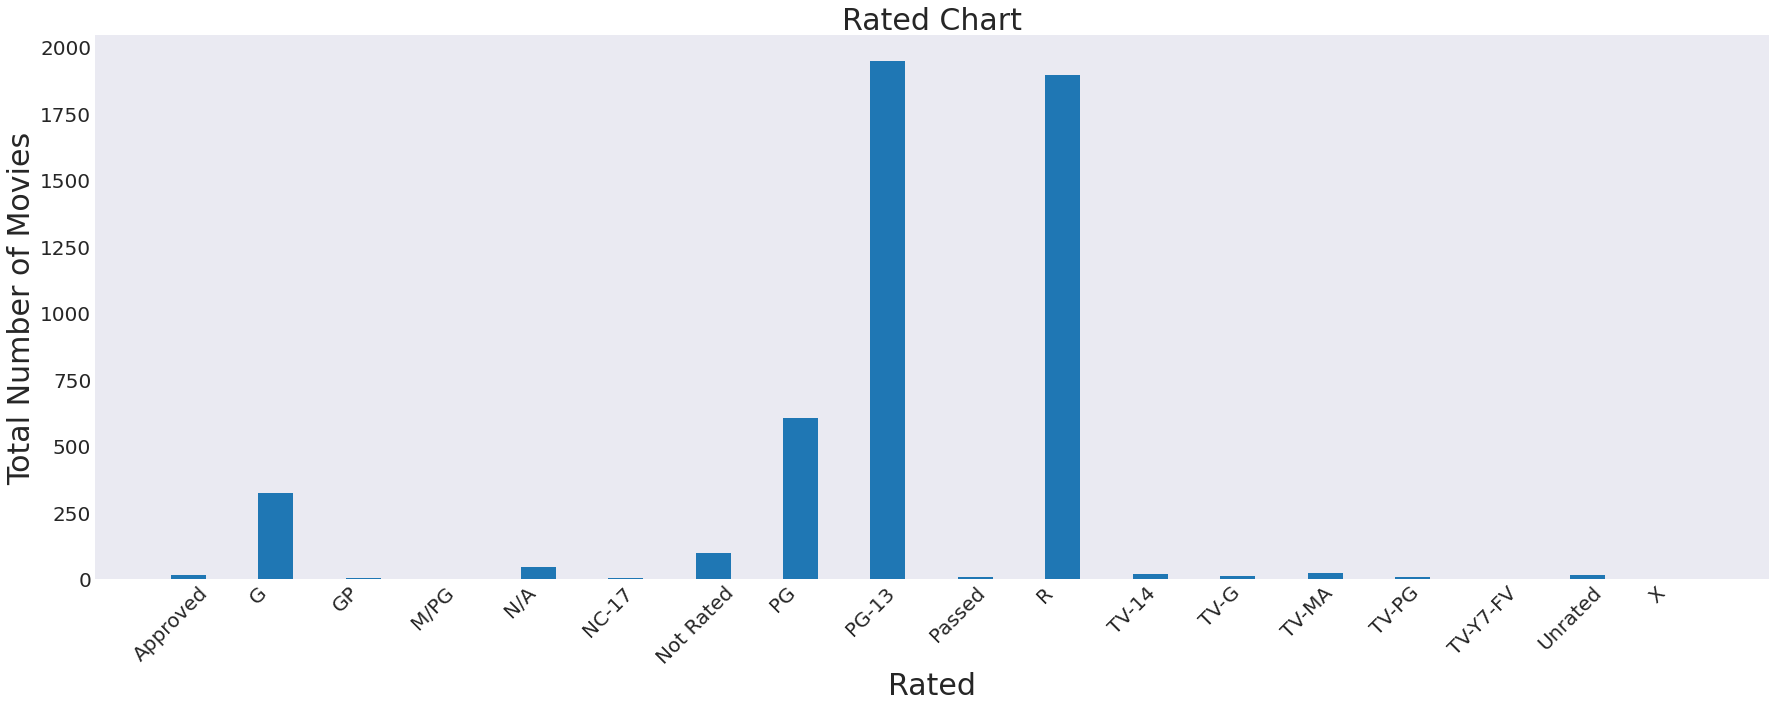

In [3]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

values, counts = utils.get_frequencies(movie_table.data, movie_table.column_names, "rated")
plot_utils.bar_chart(values, counts, "Rated Chart", "Rated", "Total Number of Movies")

# Genre before evening out data

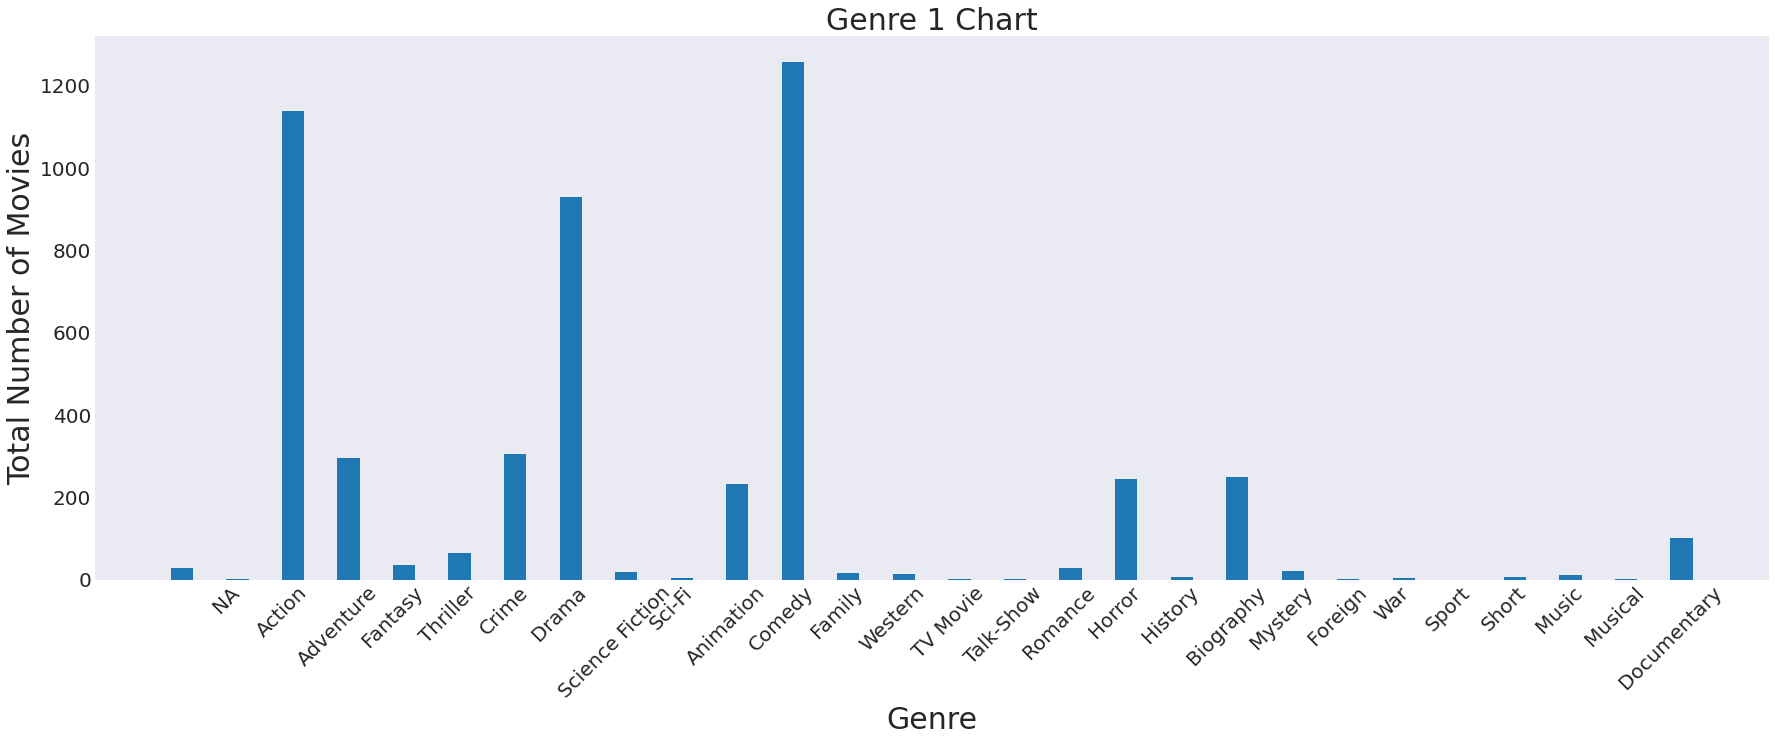

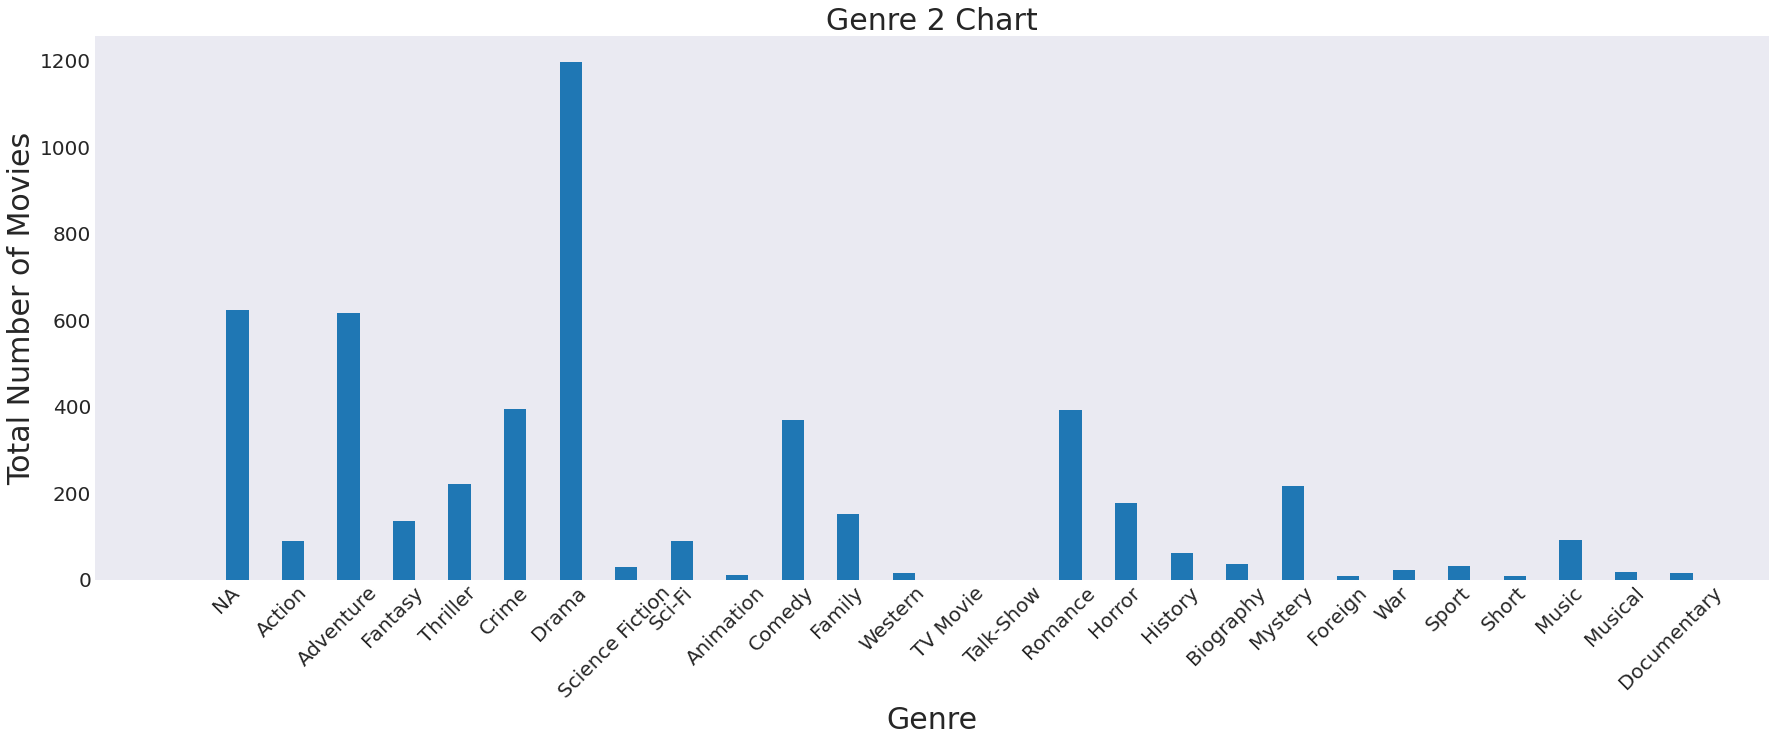

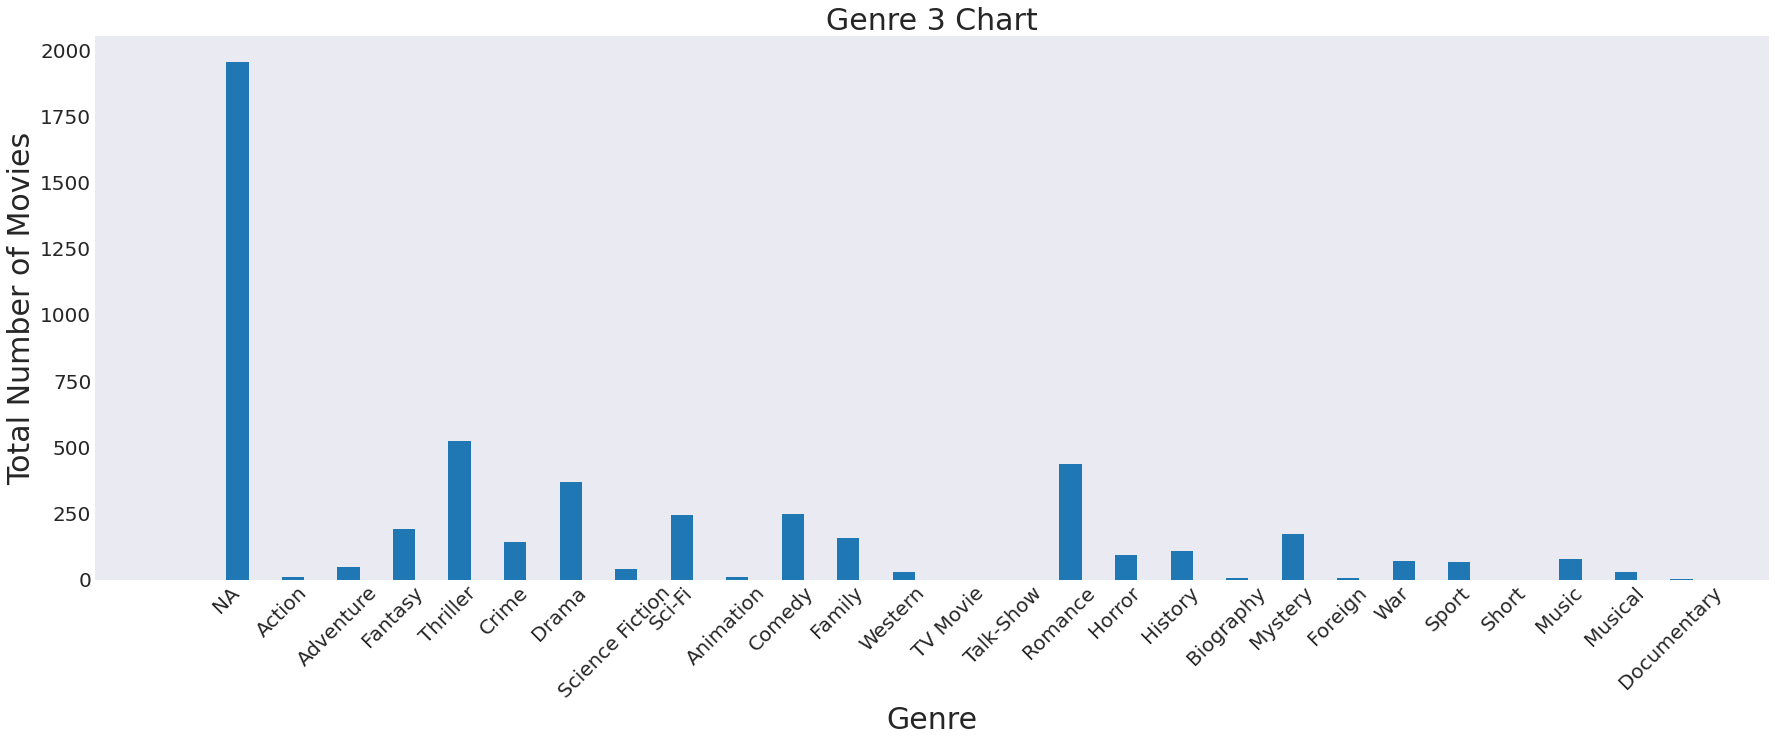

In [4]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
genre_1, genre_2, genre_3 = myutils.seperate_genre(movie_table.get_column("genres"))

counts, values = myutils.get_genre_count(genre_1, False)
plot_utils.bar_chart(values, counts, "Genre 1 Chart", "Genre", "Total Number of Movies")
counts, values = myutils.get_genre_count(genre_2, False)
plot_utils.bar_chart(values, counts, "Genre 2 Chart", "Genre", "Total Number of Movies")
counts, values = myutils.get_genre_count(genre_3, False)
plot_utils.bar_chart(values, counts, "Genre 3 Chart", "Genre", "Total Number of Movies")

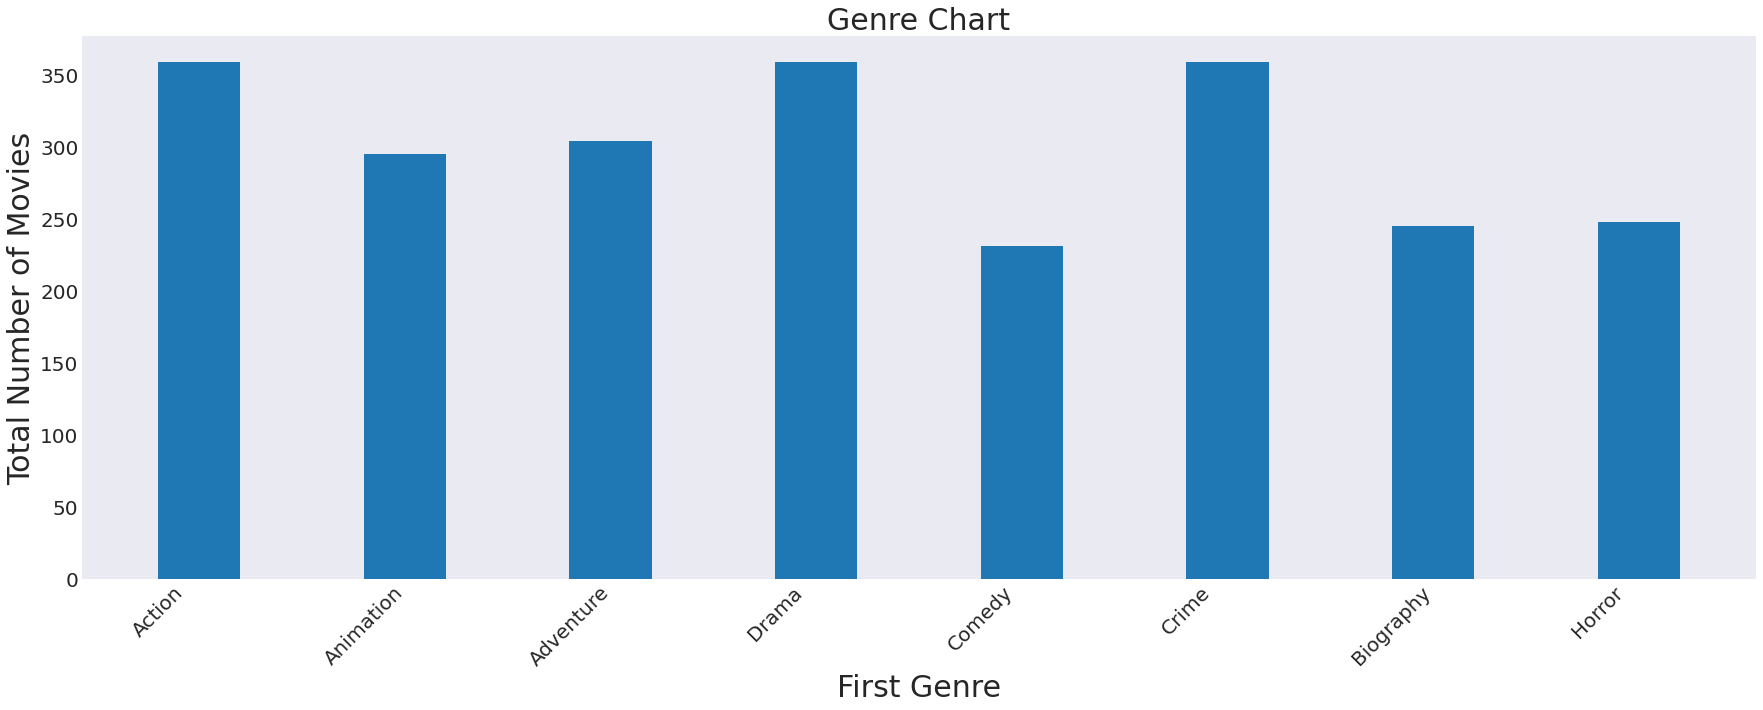

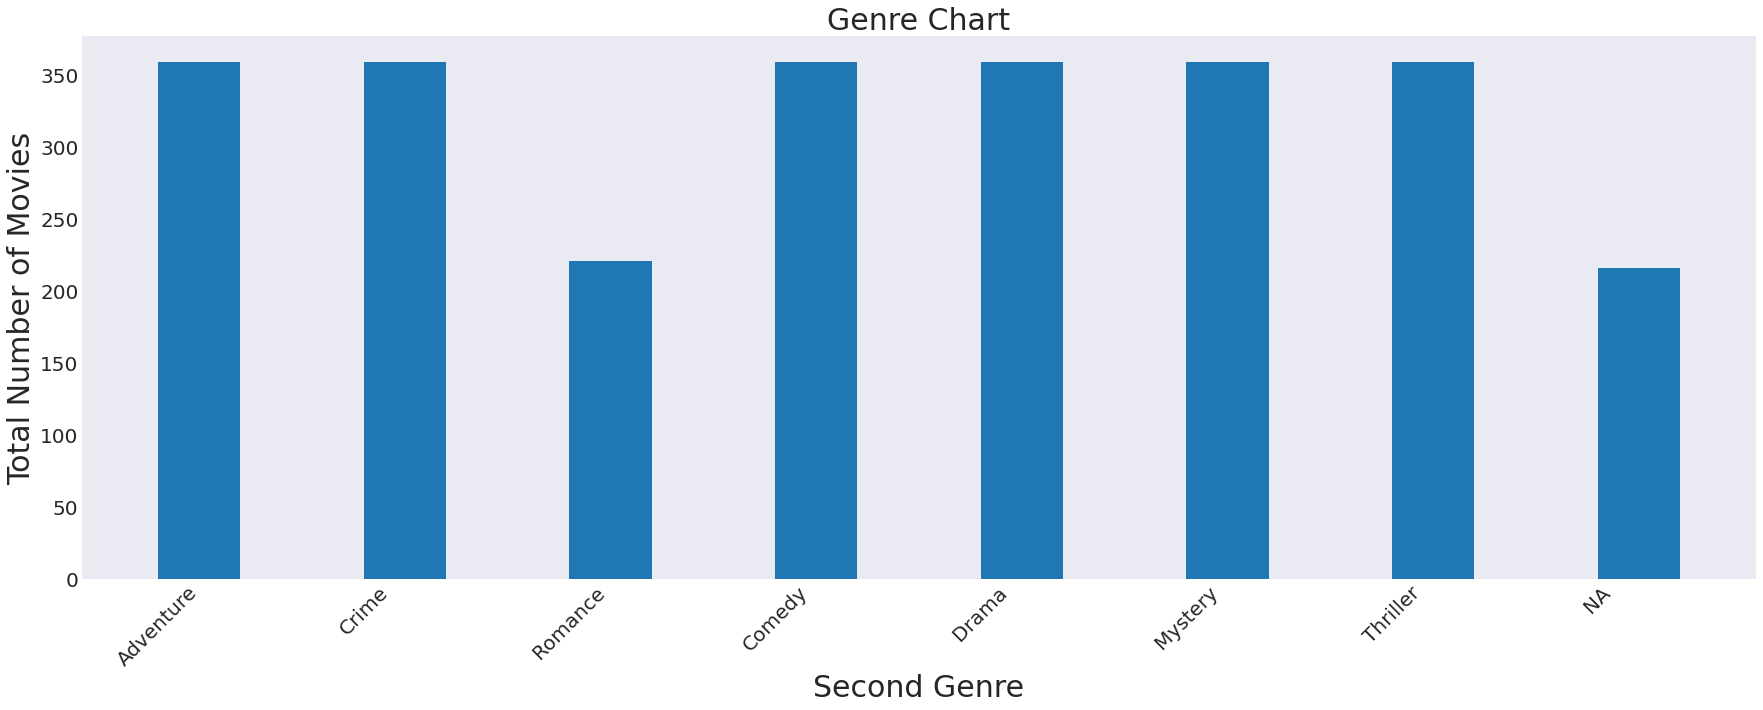

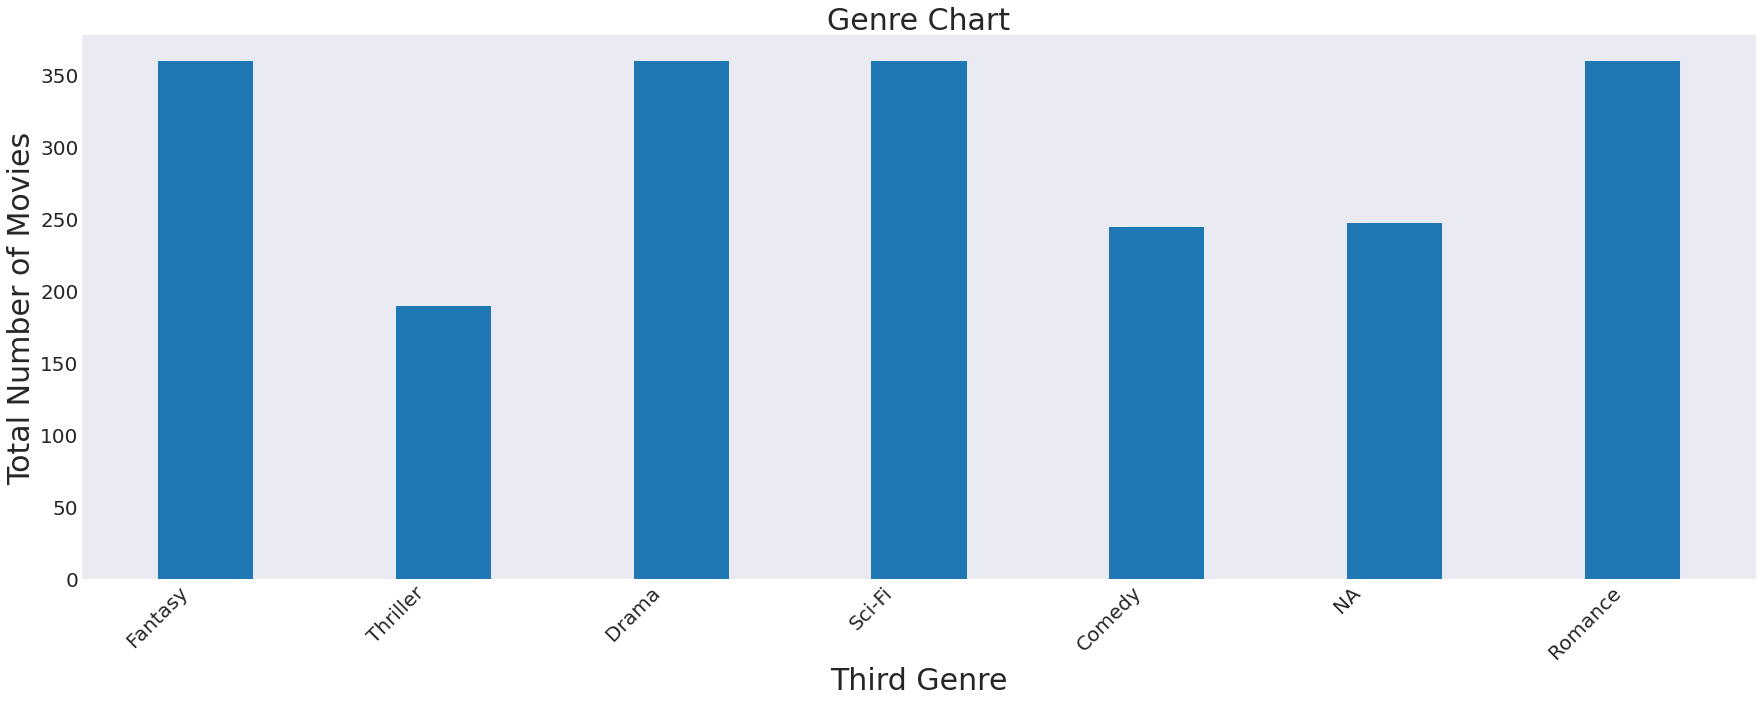

In [5]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier
genres_unique =  ['Documentary', 'Musical', 'Music', 'Short', 'Sport', 'War', 'Foreign',
     'Mystery', 'Biography', 'History', 'Horror', 'Romance', 'Talk-Show', 'TV Movie',
     'Western', 'Family', 'Comedy', 'Animation', 'Sci-Fi', 'Science Fiction',
     'Drama', 'Crime', 'Thriller', 'Fantasy', 'Adventure', 'Action', 'NA', '']
genre_1, used_columns_1 = myutils.even_out_lists(genre_1, genres_unique)
genre_2, used_columns_2 = myutils.even_out_lists(genre_2, genres_unique)
genre_3, used_columns_3 = myutils.even_out_lists(genre_3, genres_unique)
counts, values = myutils.get_genre_count(genre_1)
plot_utils.bar_chart(used_columns_1, counts, "Genre Chart", "First Genre", "Total Number of Movies")
counts, values = myutils.get_genre_count(genre_2)
plot_utils.bar_chart(used_columns_2, counts, "Genre Chart", "Second Genre", "Total Number of Movies")
counts, values = myutils.get_genre_count(genre_3)
plot_utils.bar_chart(used_columns_3, counts, "Genre Chart", "Third Genre", "Total Number of Movies")


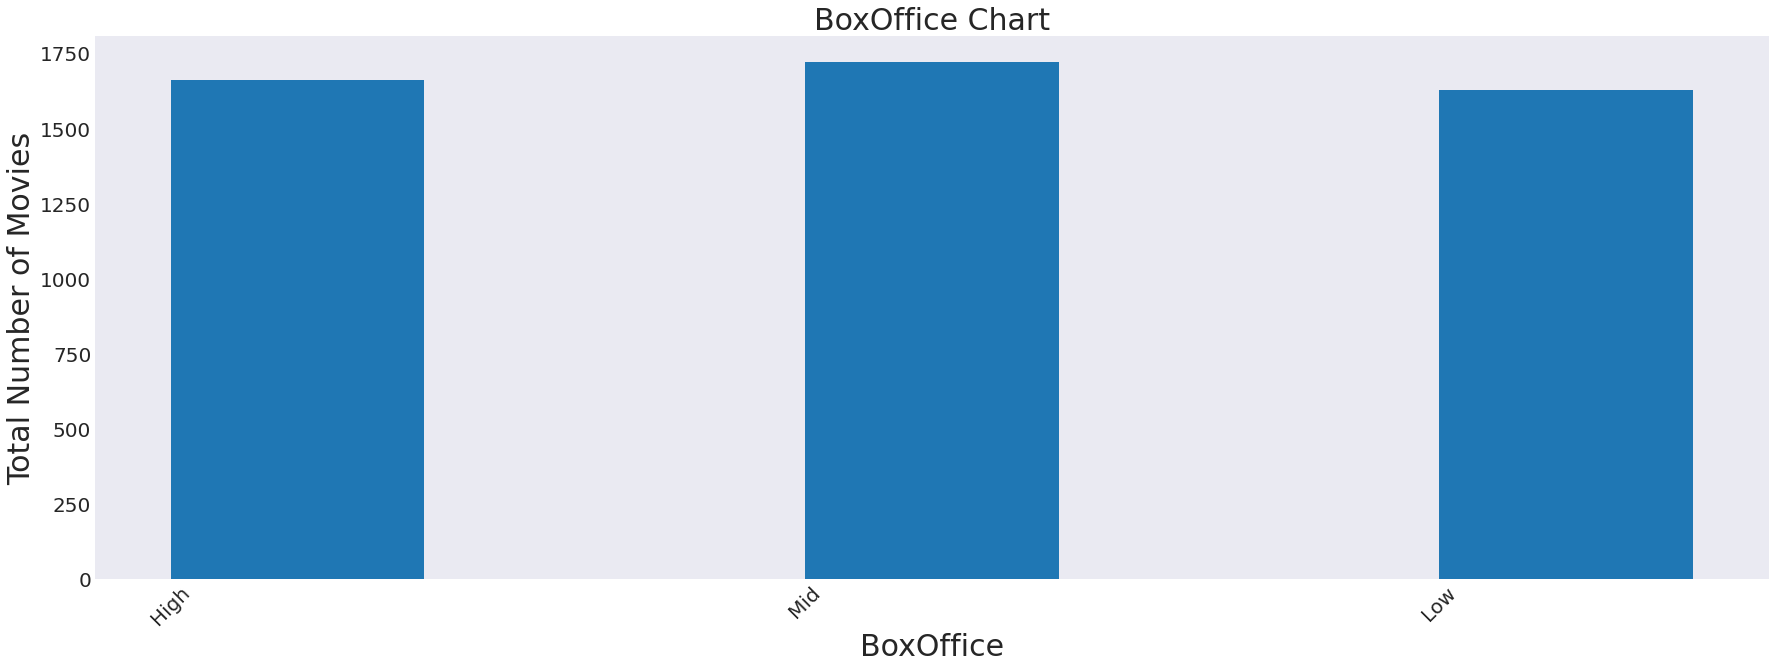

In [6]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

boxoffices_high_low = myutils.find_low_mid_high(boxoffices, 1000000.0, 35000000.0)
values = ["High", "Mid", "Low"]
counts = [0,0,0]
for value in boxoffices_high_low:
    if value == values[0]:
        counts[0] += 1
    elif value == values[1]:
        counts[1] += 1
    elif value == values[2]:
        counts[2] += 1
plot_utils.bar_chart(values, counts, "BoxOffice Chart", "BoxOffice", "Total Number of Movies")



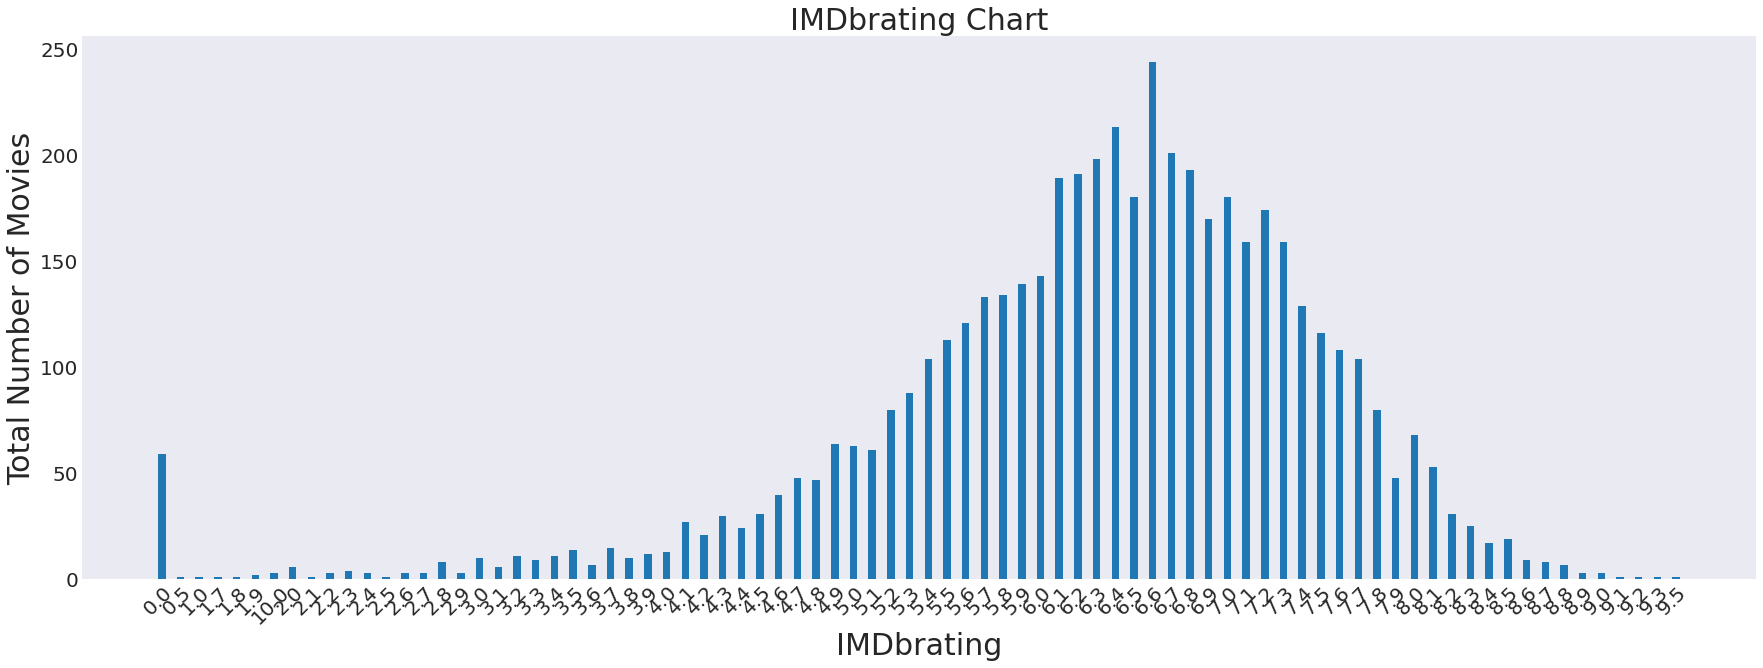

In [7]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

values, counts = utils.get_frequencies(movie_table.data, movie_table.column_names, "imdbrating")
plot_utils.bar_chart(values, counts, "IMDbrating Chart", "IMDbrating", "Total Number of Movies")

### Data Visualization Results
These were the major impacting attributes to our classification. Rated, IMDbrating, Genres, and BoxOffice revenue. WE can see that there are some attributes that are spread out evenly but others that are more bell-shaped. 


In [8]:
importlib.reload(mysklearn.mypytable)
importlib.reload(mysklearn.myutils)
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

dummy, naive, tree, random_forest = pc.set_up(movie_table)


For first genre category

Step 2: Accuracy and error rate
Stratified 10-fold Cross Validation and Test Train Split
Naive Bayes: accuracy = 0.98, error rate = 0.02
Dummy: accuracy = 0.15, error rate = 0.85
Decision Tree: accuracy = 0.96, error rate = 0.04
Random Forest: accuracy = 0.14, error rate = 0.85

Step 2: Precision, recall, and F1 measure
Stratified 10-fold Cross Validation and Test Train
Naive Bayes: precision = 0.98, recall = 0.89, F1 measure = 0.94
Dummy: precision = 0.04, recall = 0.04, F1 measure = 0.04
Decision Tree: precision = 0.97, recall = 0.8, F1 measure = 0.87
Random Forest: precision = 0.97, recall = 0.8, F1 measure = 0.87

For second genre category

Step 2: Accuracy and error rate
Stratified 10-fold Cross Validation and Test Train Split
Naive Bayes: accuracy = 0.98, error rate = 0.02
Dummy: accuracy = 0.14, error rate = 0.86
Decision Tree: accuracy = 0.96, error rate = 0.04
Random Forest: accuracy = 0.15, error rate = 0.85

Step 2: Precision, recall, and F1 measur

### Classification Results
We had Naive Bayes with 100% accuracy this was our best classification by far. This is due to the nature of Naive Bayes.
Second we had Decision Tree with 80-90% accuracy. Then Dummy had a 0% accuracy. This is for prediction just titles.

We had Naive Bayes with 78% accuracy this was our best classification by a little. This is due to the nature of Naive Bayes.
Second we had Decision Tree with 77% accuracy. Then Dummy had a 13% accuracy. This is for prediction just genres.
